## Neural Network for Spam Classification
##### Author: Pei Zhang
##### Refer from Udacity Deep Learning Course
Import Data from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data, rename it as 'spambase.csv'.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'spambase.csv'
spam = pd.read_csv(data_path,header=None)

## shuffle the data
spam = spam.sample(frac=1).reset_index(drop=True)
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.19,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.199,0.0,0.000,0.000,0.0,2.204,9,205,0
1,0.00,0.00,0.00,0.0,3.27,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.545,5,17,0
2,0.22,0.44,0.00,0.0,1.33,0.22,1.33,0.0,0.0,0.22,...,0.0,0.134,0.0,0.067,0.067,0.0,1.946,22,183,1
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1,5,0
4,0.00,0.00,1.02,0.0,0.51,0.00,0.00,0.0,0.0,0.00,...,0.0,0.090,0.0,0.542,0.000,0.0,1.972,19,146,1


### Normalize the Data

In [2]:
feature_index = np.r_[0:57]
scaled_features = {}
for each in feature_index:
    mean, std = spam[each].mean(), spam[each].std()
    scaled_features[each] = [mean, std]
    spam.loc[:, each] = (spam[each] - mean)/std
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.342396,-0.017833,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,0.221818,-0.155181,-0.329876,-0.308321,-0.103037,-0.094156,-0.221522,-0.129116,0
1,-0.342396,-0.165054,-0.556700,-0.046894,4.398097,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.114925,-0.242047,-0.439169,0
2,0.378070,0.175879,-0.556700,-0.046894,1.513394,0.453207,3.105937,-0.262533,-0.323267,-0.030109,...,-0.158436,-0.018607,-0.155181,-0.247736,-0.035833,-0.103037,-0.102287,-0.154819,-0.165399,1
3,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.132102,-0.262571,-0.458960,0
4,-0.342396,-0.165054,1.466536,-0.046894,0.294086,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.181355,-0.155181,0.334607,-0.308321,-0.103037,-0.101468,-0.170212,-0.226420,1


### Split the Data into Testing, Validating and Training
test: 20%, validate: 20%, train: 60%

In [3]:
# 1/5 data for test
test_data = spam[-spam.shape[0]//5:]
test_data_feature = test_data[np.r_[0:57]]
test_data_label = test_data[57]

# 1/5 data for validate
valid_data = spam[3*spam.shape[0]//5:4*spam.shape[0]//5]
valid_data_feature = valid_data[np.r_[0:57]]
valid_data_label = valid_data[57]

# 3/5 data for train
train_data = spam[:3*spam.shape[0]//5]
train_data_feature = train_data[np.r_[0:57]]
train_data_label = train_data[57]

### Define the Two Hidden Layer Network

In [4]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_1_nodes = hidden_1_nodes
        self.hidden_2_nodes = hidden_2_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        
        #self.layer_0 = np.zeros((1,input_nodes))
        
        self.weights_0_1 = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_1_nodes))
        
        self.weights_1_2 = np.random.normal(0.0, self.hidden_1_nodes**-0.5, 
                                       (self.hidden_1_nodes, self.hidden_2_nodes))
        
        self.weights_2_3 = np.random.normal(0.0, self.hidden_2_nodes**-0.5, 
                                       (self.hidden_2_nodes, self.output_nodes))
        
        self.lr = learning_rate
        
        # sigmoid function
        self.sigmoid = lambda x : 1/(1+np.exp(-x))
        self.sigmoid_prime = lambda x: x*(1-x)
        #relu function
        self.relu = lambda x: x*(x>0).astype(float)
        self.relu_prime = lambda x: (x>0).astype(float)
        
    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        ''' 
        
        for x, y in zip(features, targets):
            #### Implement the forward pass here ####
            ### Forward pass ###
            layer_0 = x[:,None].T
            layer_1 = self.relu(layer_0.dot(self.weights_0_1))
            layer_2 = self.relu(layer_1.dot(self.weights_1_2))
            layer_3 = self.sigmoid(layer_2.dot(self.weights_2_3))

            layer_3_error = layer_3 - y       
            layer_3_delta = layer_3_error * (layer_3*(1-layer_3))
            
            layer_2_error = layer_3_delta.dot(self.weights_2_3.T) 
            layer_2_delta = layer_2_error * self.relu_prime(layer_2)
            
            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error * self.relu_prime(layer_1)

            # Update the weights
            self.weights_2_3 -= layer_2.T.dot(layer_3_delta) * self.lr # update hidden-to-output weights with gradient descent step
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.lr # update hidden1-to-hidden2 weights with gradient descent step
            self.weights_0_1 -= layer_0.T.dot(layer_1_delta) * self.lr # update input-to-hidden1 weights with gradient descent step
        
        
        
    def test(self, features, targets):
        correct=0
        for i in range(len(targets)):
            pred = self.run(features[i])
            if(pred == targets[i]):
                correct+=1
        return correct/len(targets)
        
    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        #### Implement the forward pass here ####
        layer_1 = self.relu(features.dot(self.weights_0_1))
        layer_2 = self.relu(layer_1.dot(self.weights_1_2))
        layer_3 = self.sigmoid(layer_2.dot(self.weights_2_3))
        
        if(layer_3[0] >= 0.5):
            return 1
        else:
            return 0

Run iteration: 70 , total time used:16.64 s


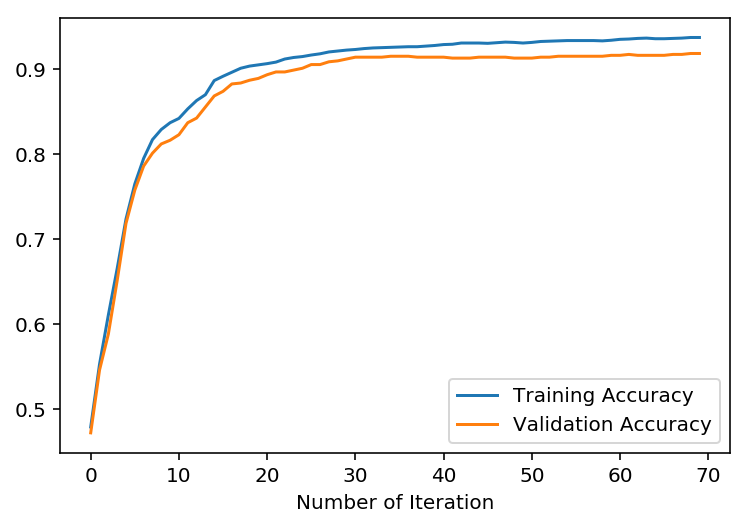

In [5]:
import time
### Set the hyperparameters here ###
iterations = 70
learning_rate = 0.001
hidden_1_nodes = 5
hidden_2_nodes = 3
output_nodes = 1

N_i = train_data_feature.shape[1]#57
network = NeuralNetwork(N_i, hidden_1_nodes, hidden_2_nodes,output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
start = time.time()
for ii in range(iterations):
                            
    network.train(train_data_feature.values, train_data_label.values)
    train_acc = network.test(train_data_feature.values, train_data_label.values)
    val_acc = network.test(valid_data_feature.values, valid_data_label.values)
    losses['train'].append(train_acc)
    losses['validation'].append(val_acc)
    
elapsed_time = float(time.time() - start)
print('Run iteration:',iterations,', total time used:{:.2f}'.format(elapsed_time),'s')

plt.plot(losses['train'], label='Training Accuracy')
plt.plot(losses['validation'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of Iteration')
_ = plt.ylim()

### Accuracy of Testing

In [7]:
correct,tot=0,0
print()
for i in range(len(test_data_label.values)):
    pred = network.run(test_data_feature.values[i])
    if(pred == test_data_label.values[i]):
        correct += 1
    tot+=1
print('Testing Accuracy:{:.2%}'.format(correct/tot))



Testing Accuracy:91.64%
